# ARCH

In [1]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("notebook")

import pandas as pd
import sqlite3

## Conditional heteroskedasticity

Time series models are (largely) models of the temporal dependence observed in time series data

* the future depends of the past
* the past is informative about the future

$$ p(z_{t+h} | z_{t}, z_{t-1}, \cdots) \neq p(z_{t+h})$$

Central objective of time series modeling is characterizing temporal dependence, i.e. characterizing  

$$ p(z_{t+h} | z_{t}, z_{t-1}, \cdots) $$

or characterizing some of its moments, such as

$$ 
\begin{align}
\operatorname{E}(z_{t+h} | z_{t}, z_{t-1}, \cdots) = \operatorname{E}_{t}(z_{t+h})  \\
\operatorname{var}(z_{t+h} | z_{t}, z_{t-1}, \cdots) = \operatorname{var}_{t}(z_{t+h})
\end{align}
$$

So far, we have seen models for the conditional mean.

* for example, in $z_t = \alpha z_{t-1} + \varepsilon_t$ the conditional mean is

$$\operatorname{E}(z_{t+1} | z_{t}, z_{t-1}, \cdots) = \operatorname{E}(z_{t+1} | z_{t}) = \alpha z_t $$

changes with $z_t$

However, the assumptions about $\varepsilon_t$ imply that $\operatorname{var}(z_{t+h} | z_{t}, z_{t-1}, \cdots) $ is a constant (independent of $z_t, z_{t-1}, \cdots$)

* for example, in $z_t = \alpha z_{t-1} + \varepsilon_t$

$$
\operatorname{var}(z_{t+1} | z_{t}, z_{t-1}, \cdots) = \operatorname{var}(\varepsilon_{t+1} | z_{t}) = \operatorname{var}(\varepsilon_{t+1}) = \sigma^2
$$

independent of $z_t$

### Gaussian time series model

$$
p(\underbrace{z_1, z_2, \cdots, z_T}_{\mathbf{z}_1}, \underbrace{z_{T+1},\cdots, z_{T+h}}_{\mathbf{z}_2}) = p(\mathbf{z}_1, \mathbf{z}_2) \sim \mathcal{N}(\boldsymbol \mu, \mathbf{\Sigma}).
$$

Forecasts

$$
p(\mathbf{z}_2 | \mathbf{z}_1) = \mathcal{N}(\boldsymbol \mu_2 + \mathbf{\Sigma}_{2 1} \mathbf{\Sigma}^{-1}_{1 1} (\mathbf{z}_1 - \boldsymbol \mu_1), \mathbf{\Sigma}_{2 2} - \mathbf{\Sigma}_{2 1}\mathbf{\Sigma}_{1 1}^{-1}\mathbf{\Sigma}_{1 2}) 
$$

* $\operatorname{E}(\mathbf{z}_2 | \mathbf{z}_1) = \boldsymbol \mu_2 + \mathbf{\Sigma}_{2 1} \mathbf{\Sigma}^{-1}_{1 1} (\mathbf{z}_1 - \boldsymbol \mu_1)\;\;\;\;\;$    __function of $\mathbf{z}_1$__      
* $\operatorname{cov}(\mathbf{z}_2 | \mathbf{z}_1) = \mathbf{\Sigma}_{2 2} - \mathbf{\Sigma}_{2 1}\mathbf{\Sigma}_{1 1}^{-1}\mathbf{\Sigma}_{1 2}\;\;\;\;\;\;\;\;\;$  __constant__   

More generally, if

$$
\begin{align}
\varepsilon_{t} = z_{t} - \operatorname{E}(z_{t} | z_{t-1}, z_{t-2}, \cdots) 
\end{align}
$$

then

$$\operatorname{E}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots) = 0$$

and

$$\operatorname{E}(\varepsilon^2_{t} | z_{t-1}, z_{t-2}, \cdots) = \operatorname{var}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots) = \operatorname{var}(z_{t} | z_{t-1}, z_{t-2}, \cdots)$$

For $\operatorname{var}(z_{t} | z_{t-1}, z_{t-2}, \cdots)$ to vary with $(z_{t-1}, z_{t-2}, \cdots)$, we need $\operatorname{var}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots)$ to be a function of $(z_{t-1}, z_{t-2}, \cdots)$


$$
\begin{align}
\operatorname{var}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots) &= \operatorname{E}(\varepsilon^2_{t} | z_{t-1}, z_{t-2}, \cdots) = h(z_{t-1}, z_{t-2}, \cdots) = \sigma^2_t\\
\end{align}
$$

where $h(.)$ is non-negative

and therefore

$$ \operatorname{var}(z_{t} | z_{t-1}, z_{t-2}, \cdots) = \sigma^2_t$$

__conditional heteroskedasticity__ models are models for $\sigma^2_t$

* $\sigma^2_t = \sigma^2$ - homoskedasticity
* $\sigma^2_t \neq \sigma^2$ - heteroskedasticity

## Autoregressive conditional heteroskedasticity (ARCH) models

### ARCH(1) 

$$\sigma^2_t = \omega_0 + \omega_1 \varepsilon^2_{t-1}$$

* $\omega_0>0$, $\omega_1 \geq 0 $ (for $\sigma^2_t$ to be positive)

* large shocks ($\varepsilon_{t-1}$) are expected to be followed by other large shocks ( large $\operatorname{var}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots)$ )

Since $\varepsilon_{t}$ is innovation process (unpredictable)

$$\operatorname{E}_{t-1}(\varepsilon_{t}) = 0$$

we have 

$$\operatorname{E}_{t-1}(\varepsilon^2_{t}) = \operatorname{var}_{t-1}(\varepsilon_{t}) = \sigma_t^2= \omega_0 + \omega_1 \varepsilon^2_{t-1}$$

and defining $\nu_t = \varepsilon^2_{t} - \operatorname{E}_{t-1}(\varepsilon^2_{t}) $


$$\varepsilon^2_{t}= \omega_0 + \omega_1 \varepsilon^2_{t-1} + \nu_t$$

From

$$\operatorname{E}(\varepsilon_{t} | \varepsilon_{t-1}, \varepsilon_{t-2}, \cdots) = \operatorname{E}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots) = 0$$

and

$$\operatorname{var}(\varepsilon_{t} | \varepsilon_{t-1}, \varepsilon_{t-2}, \cdots) = \operatorname{var}(\varepsilon_{t} | z_{t-1}, z_{t-2}, \cdots) = \omega_0 + \omega_1 \varepsilon^2_{t-1}$$

follows

$$\operatorname{E}(\varepsilon^2_{t} | \varepsilon_{t-1}, \varepsilon_{t-2}, \cdots) = \operatorname{var}(\varepsilon_{t} | \varepsilon_{t-1}, \varepsilon_{t-2}, \cdots) = \sigma_t^2= \omega_0 + \omega_1 \varepsilon^2_{t-1}$$

and

$$\varepsilon^2_{t}= \omega_0 + \omega_1 \varepsilon^2_{t-1} + \nu_t, \;\;\; \text{where} \;\; \nu_t = \varepsilon^2_{t} - \operatorname{E}(\varepsilon^2_{t} | \varepsilon_{t-1}, \varepsilon_{t-2}, \cdots) $$

$$
\nu_t = \varepsilon^2_{t} - \operatorname{E}(\varepsilon^2_{t} | \varepsilon_{t-1}, \varepsilon_{t-2}, \cdots) = \sigma^2_t(\epsilon_t^2 - 1)
$$

$$\varepsilon^2_{t}= \omega_0 + \omega_1 \varepsilon^2_{t-1} + \nu_t$$

* AR(1) model for $\varepsilon^2_{t}$

* $\varepsilon^2_{t}$ are positively autocorrelated ($\varepsilon_{t}$ are uncorrelated)

* stationarity: $\omega_1<1$

* unconditional mean of $\varepsilon^2_{t}$ :

$$ \operatorname{E} \varepsilon^2_{t} = \frac{\omega_0}{1-\omega_1} $$

* unconditional variance of $\varepsilon_{t}$:

$$\operatorname{E} \varepsilon_{t} = 0 \Rightarrow \operatorname{var}(\varepsilon_{t}) = \operatorname{E} \varepsilon^2_{t} = \frac{\omega_0}{1-\omega_1} = \sigma^2$$

* $\varepsilon_{t}$ and $z_t$ are __stationary__ (unconditional moments are time-invariant)

* large (relative to $\sigma^2$) shocks expected after large (relative to $\sigma^2$) shocks

$$ \varepsilon^2_{t} - \sigma^2 = \omega_0 + \omega_1 (\varepsilon^2_{t-1} - \sigma^2) + \nu_t$$

### ARCH(q)

$$\sigma^2_t = \omega_0 + \sum_{i}^{q }\omega_i \varepsilon^2_{t-i}$$

as before 

$$\varepsilon^2_{t}= \omega_0 + \sum_{i}^{q}\omega_i \varepsilon^2_{t-i} + \nu_t$$

* AR(q) model for $\varepsilon^2_{t}$

### Estimation

#### Pure volatility models

$$ z_t = \mu +  \varepsilon_t$$

Let

$$e_t \overset{iid}{\sim} (0, 1)$$

Then, we can write

$$
\begin{align}
\varepsilon_t &= \sigma_t e_t\\\\
\end{align}
$$

$$
\begin{align}
\varepsilon_t &= \sigma_t \epsilon_t\\\\
& \text{and}\\\\
\frac{z_t}{\sigma_t} &=\epsilon_t 
\end{align}
$$

* if $e_t \overset{iid}{\sim} \mathcal{N}(0, 1)$ the conditional density of $z_t$ is 

$$
z_t |z_{t-1}, \cdots, z_1 \sim \mathcal{N}(\mu, \sigma^2_t)
$$

because at time $t-1$, $\sigma_t$ is known, i.e. a constant

* and the conditional log-likelihood of $z_t$

$$
\ell_t(\boldsymbol \theta) = -\frac{1}{2}\operatorname{ln}2\pi - \frac{1}{2}\operatorname{ln}\sigma_t - \frac{z_t-\mu}{2 \sigma_t^2}
$$

* the likelihood of $\{z_1, z_2, \cdots, z_{T}\}$

$$\ell(\boldsymbol \theta | \mathbf{z}) = \sum_{t=1}^{T} \ell_t(\boldsymbol \theta)  $$ 

#### Time-varying mean

$$ z_t = \mu_t +  \varepsilon_t$$

* $\mu_t = \operatorname{E}_{t-1} z_t$

* for example

$$\mu_t = \alpha_0 + \alpha_1 z_{t-1}$$

* conditional log-likelihood of $z_t$

$$
\ell_t(\boldsymbol \theta) = -\frac{1}{2}\operatorname{ln}2\pi - \frac{1}{2}\operatorname{ln}\sigma_t - \frac{z_t-\mu_t}{2 \sigma_t^2}
$$

* the likelihood of $\{z_1, z_2, \cdots, z_{T}\}$

$$\ell(\boldsymbol \theta | \mathbf{z}) = \sum_{t=1}^{T} \ell_t(\boldsymbol \theta)  $$ 

### ARCH models in Python

In [2]:
from arch import arch_model

In [5]:
conn = sqlite3.connect(database='FCI_EIKON_long.db')

query ='SELECT * FROM "Eikon-daily" WHERE variable=="STOXXE"'
df = pd.read_sql_query(query, conn)

df = df.set_index('time', drop=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index().dropna()
euro_stoxx = df.drop('variable', axis=1)
euro_stoxx.columns = ['EURO STOXX INDEX']

euro_stoxx_returns = 100 * euro_stoxx.pct_change().dropna()['2004':]
euro_stoxx_returns.columns = ['EURO STOXX Returns']

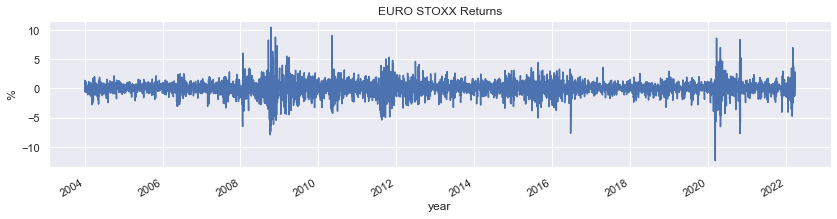

In [6]:
fig = euro_stoxx_returns.plot(figsize=(14,3), legend=False, title='EURO STOXX Returns', ylabel='%', xlabel='year')

#### Estimate ARCH(1)

In [7]:
arch1 = arch_model(y=euro_stoxx_returns, mean='constant', vol='ARCH')
arch1

Constant Mean(constant: yes, no. of exog: 0, volatility: ARCH(p: 1), distribution: Normal distribution), id: 0x2a8f1847f70

In [8]:
res = arch1.fit(update_freq=0)
print(res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7748.798771475143
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:     EURO STOXX Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7748.80
Distribution:                  Normal   AIC:                           15503.6
Method:            Maximum Likelihood   BIC:                           15523.0
                                        No. Observations:                 4749
Date:                Mon, Apr 04 2022   Df Residuals:                     4748
Time:                        17:29:15   Df Model:                            1
                                 Mean Model                                 
     

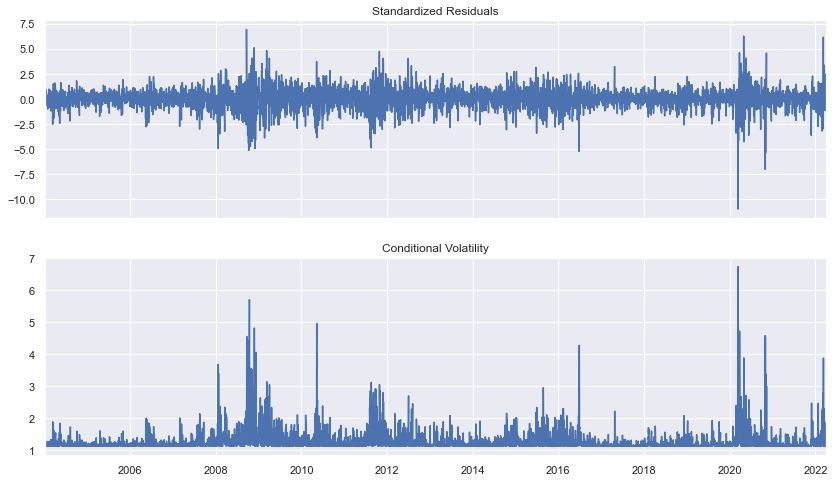

In [9]:
fig = res.plot()
fig.set_figheight(val=8)
fig.set_figwidth(val=14)

#### Forecasting

In [22]:
forecasts = res.forecast(reindex=False, horizon=12)

forecasts.variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12
time,,,,,,,,,,,,
2022-03-30,1.672126,1.706939,1.716939,1.719811,1.720636,1.720873,1.720941,1.720961,1.720967,1.720968,1.720969,1.720969


In [23]:
forecasts.mean

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12
time,,,,,,,,,,,,
2022-03-30,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386,0.042386


In [10]:
from arch.univariate import ARCH

arch7 = arch1
arch7.volatility = ARCH(p=7)
arch7

Constant Mean(constant: yes, no. of exog: 0, volatility: ARCH(p: 7), distribution: Normal distribution), id: 0x2a8f1847f70

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7018.71525122455
            Iterations: 19
            Function evaluations: 216
            Gradient evaluations: 19


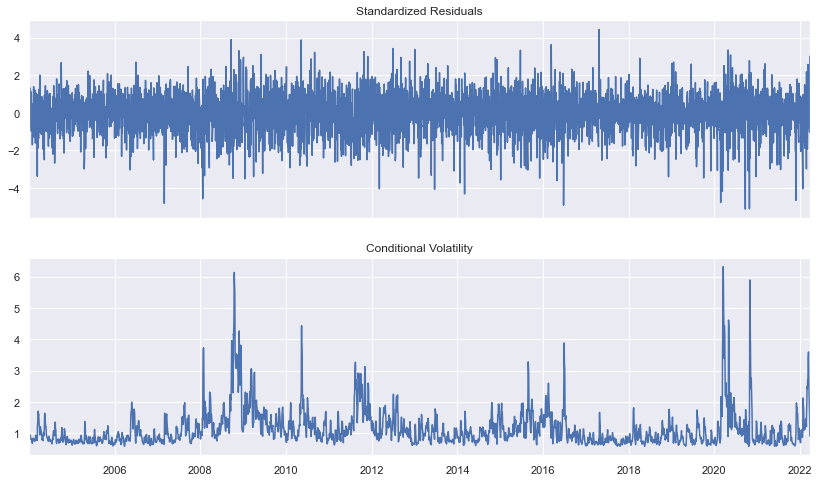

In [11]:
res = arch7.fit(update_freq=0)
fig = res.plot()
fig.set_figheight(val=8)
fig.set_figwidth(val=14)

#### Specifying model for the conditional mean

In [15]:
dcpi = pd.read_csv('HICP_unadj_ANR_clean.csv', index_col=0, parse_dates=True)
infl_pt = dcpi[['PT']].copy()

<AxesSubplot:title={'center':'Inflation, PT'}, xlabel='date'>

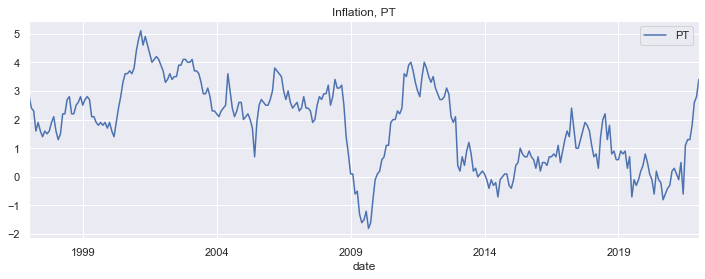

In [16]:
infl_pt.plot(figsize=(12,4), title='Inflation, PT')

In [10]:
from arch.univariate import ARX

arch_ar_model = ARX(infl_pt,
                    constant=True,
                    lags=[1, 12],
                    volatility=ARCH(p=1))

#arch_ar_model.volatility = ARCH(p=1) # to add volatility if not specified above

arch_ar_model

AR(constant: yes, lags: 1, 12, no. of exog: 0, volatility: ARCH(p: 1), distribution: Normal distribution), id: 0x1f7a54a55d0

$$z_t = \alpha + \alpha_1 z_{t-1} +  \alpha_{12} z_{t-12} + \varepsilon_t \;\;\;\;\; \varepsilon_t \sim \text{ARCH(1)}$$

In [35]:
res_arch_ar_model = arch_ar_model.fit(update_freq=0, disp="off")
print(res_arch_ar_model.summary())

                           AR - ARCH Model Results                            
Dep. Variable:                     PT   R-squared:                       0.920
Mean Model:                        AR   Adj. R-squared:                  0.919
Vol Model:                       ARCH   Log-Likelihood:               -147.565
Distribution:                  Normal   AIC:                           305.130
Method:            Maximum Likelihood   BIC:                           323.462
                                        No. Observations:                  289
Date:                Sun, Apr 03 2022   Df Residuals:                      286
Time:                        23:43:26   Df Model:                            3
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.0990  4.107e-02      2.411  1.590e-02  [1.85

In [36]:
ar_model = ARX(infl_pt,
                    constant=True,
                    lags=[1, 12])

res_ar_model = ar_model.fit(update_freq=0, disp="off")
print(res_ar_model.summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                     PT   R-squared:                       0.920
Mean Model:                        AR   Adj. R-squared:                  0.920
Vol Model:          Constant Variance   Log-Likelihood:               -153.943
Distribution:                  Normal   AIC:                           315.887
Method:            Maximum Likelihood   BIC:                           330.553
                                        No. Observations:                  289
Date:                Sun, Apr 03 2022   Df Residuals:                      286
Time:                        23:43:44   Df Model:                            3
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.1315  4.353e-02      3.020  2.531e-

In [37]:
forecasts = res_arch_ar_model.forecast(reindex=False, horizon=6)
forecasts.mean

,h.1,h.2,h.3,h.4,h.5,h.6
date,,,,,,
2022-01-01,3.498751,3.610983,3.736772,3.82449,3.983794,4.034121


In [38]:
forecasts.variance

,h.1,h.2,h.3,h.4,h.5,h.6
date,,,,,,
2022-01-01,0.193844,0.375625,0.555719,0.736862,0.91979,1.104713
